### Column Info
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- cnt: count of total rental bikes including both casual and registered
---

### Rule:
1. Gunakan Tabel Correlation Matrix dan HeatMap
2. Gunakan Teknik Visualisasi yang tepat
3. Gunakan minimal 3 Algoritma dan bandingkan kinerjanya
4. Gunakan Matrik Evaluasi yang tepat
5. Usahakan nilai prediksi seakurat mungkin

In [223]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [224]:
df = pd.read_csv('bike.csv')
df.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61
17378,17379,12/31/2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49


In [225]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


<AxesSubplot:xlabel='season', ylabel='cnt'>

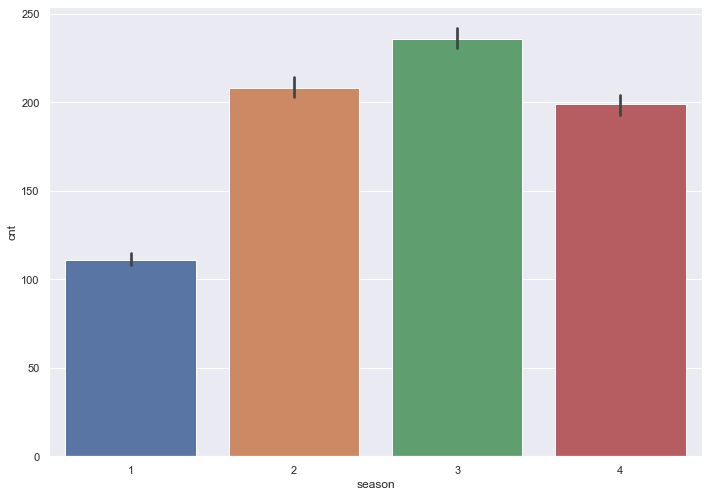

In [227]:
# Visualisasi pengaruh musim terhadap penyewaan sepeda
sns.barplot(data=df, x = df['season'], y=df['cnt'])

<AxesSubplot:xlabel='yr', ylabel='cnt'>

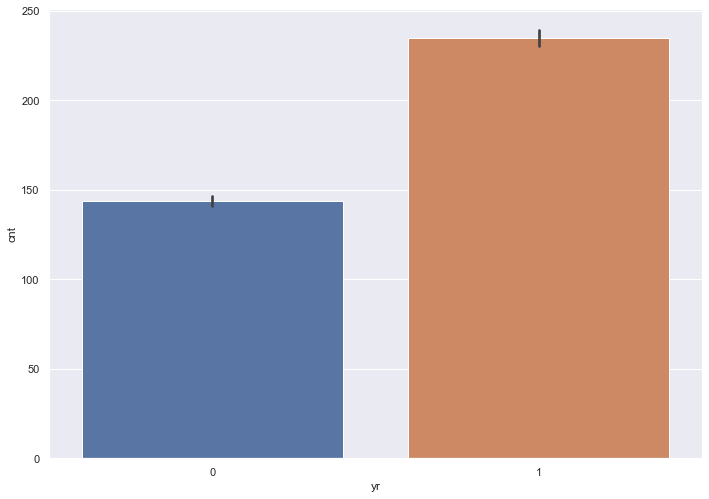

In [228]:
# Visualisasi pengaruh tahun terhadap penyewaan sepeda
sns.barplot(data=df, x = df['yr'], y=df['cnt'])

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

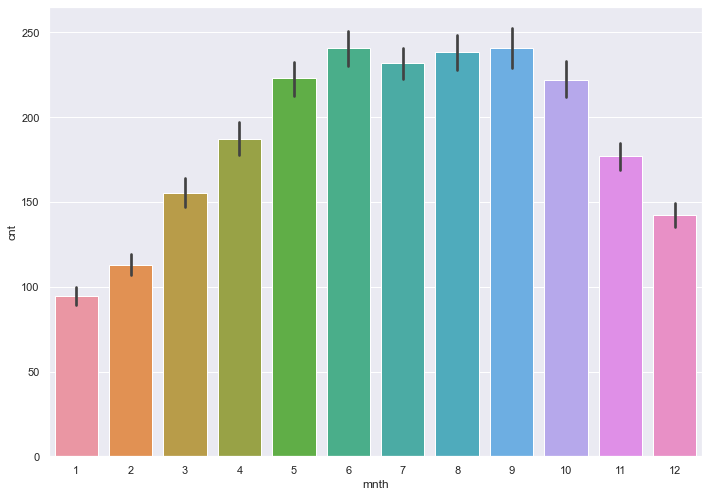

In [229]:
# Visualisasi pengaruh bulan terhadap penyewaan sepeda
sns.barplot(data=df, x = df['mnth'], y=df['cnt'])

<AxesSubplot:xlabel='hr', ylabel='cnt'>

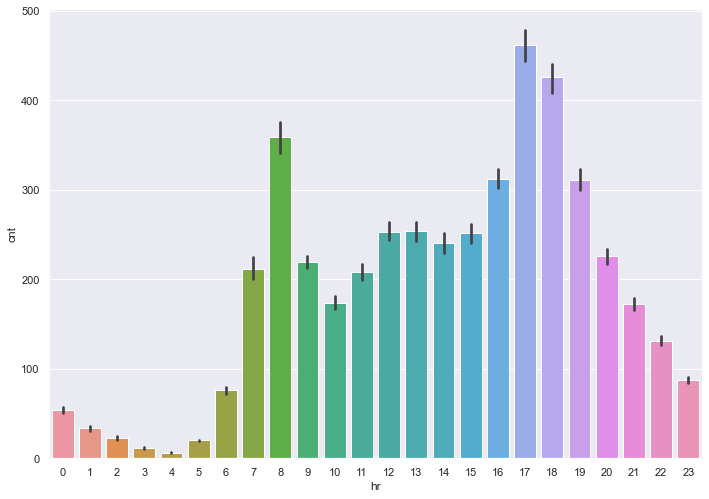

In [230]:
# Visualisasi pengaruh jam terhadap penyewaan sepeda
sns.barplot(data=df, x = df['hr'], y=df['cnt'])

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

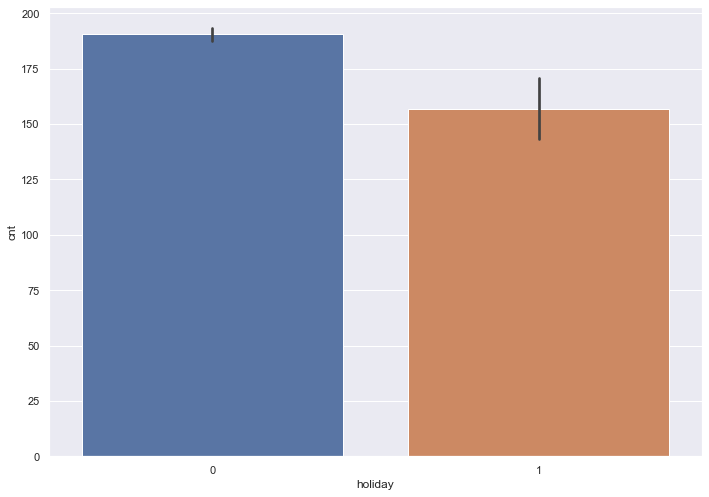

In [231]:
# Visualisasi pengaruh hari libur terhadap penyewaan sepeda
sns.barplot(data=df, x = df['holiday'], y=df['cnt'])

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

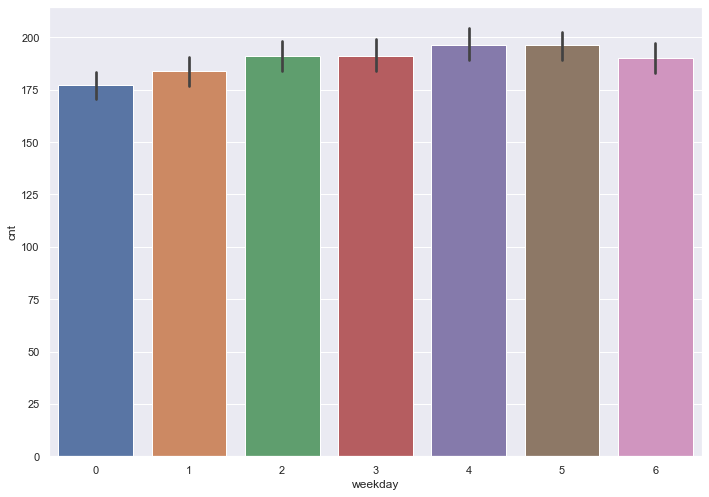

In [232]:
# Visualisasi pengaruh weekend terhadap penyewaan sepeda
sns.barplot(data=df, x = df['weekday'], y=df['cnt'])

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

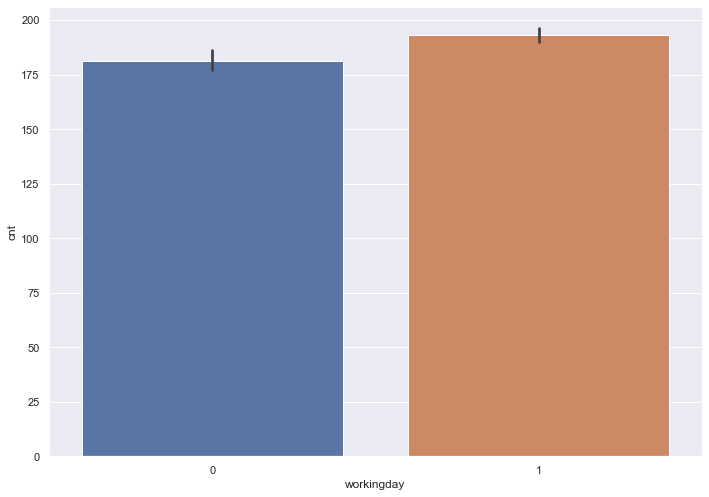

In [233]:
# Visualisasi pengaruh hari kerja terhadap penyewaan sepeda
sns.barplot(data=df, x = df['workingday'], y=df['cnt'])

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

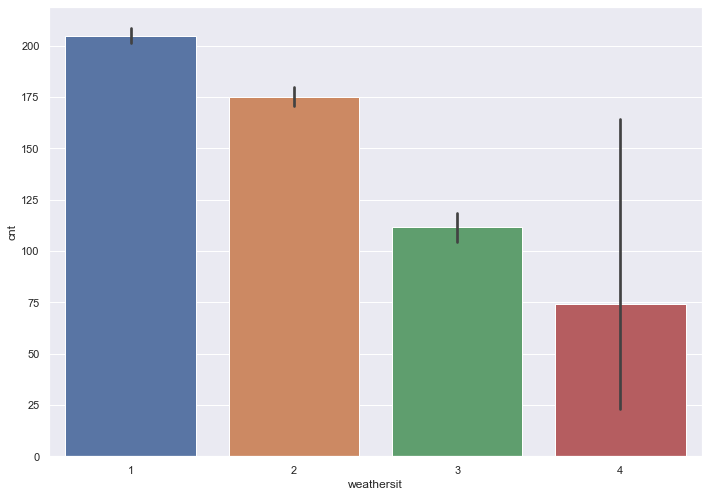

In [234]:
# Visualisasi pengaruh cuaca terhadap penyewaan sepeda
sns.barplot(data=df, x = df['weathersit'], y=df['cnt'])

<AxesSubplot:xlabel='temp', ylabel='cnt'>

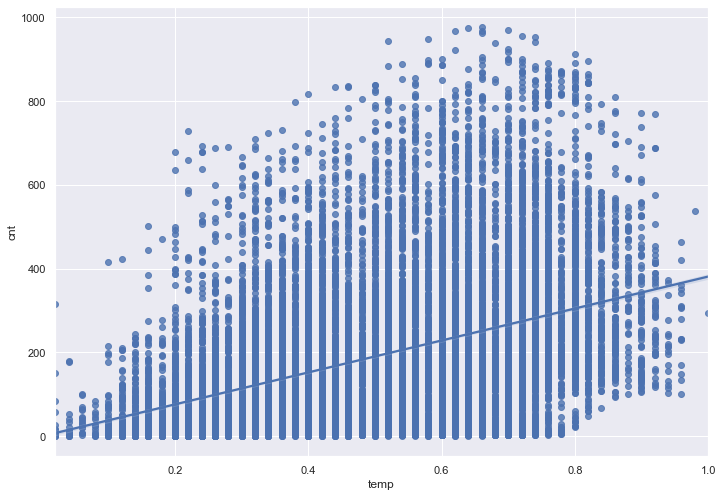

In [235]:
# Visualisasi pengaruh suhu terhadap penyewaan sepeda
sns.regplot(data=df, x = df['temp'], y=df['cnt'])

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

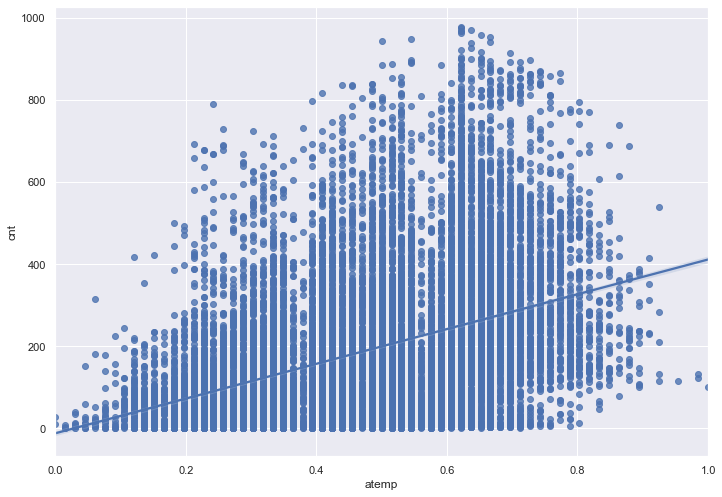

In [236]:
# Visualisasi pengaruh suhu (real feel) terhadap penyewaan sepeda
sns.regplot(data=df, x = df['atemp'], y=df['cnt'])

<AxesSubplot:xlabel='hum', ylabel='cnt'>

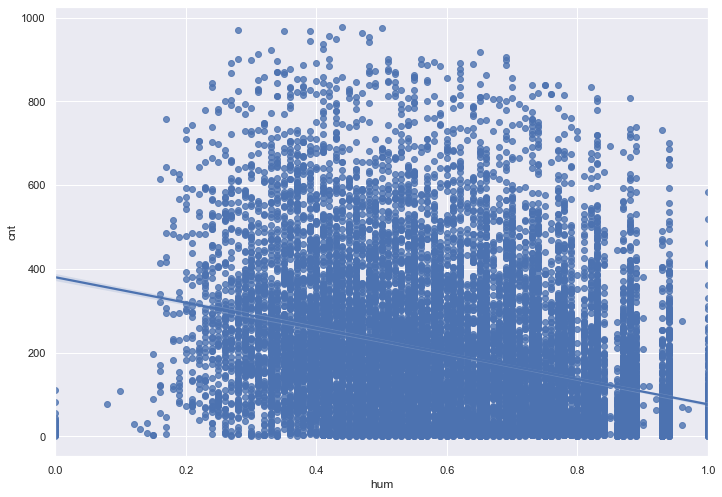

In [237]:
# Visualisasi pengaruh kelembaban terhadap penyewaan sepeda
sns.regplot(data=df, x = df['hum'], y=df['cnt'])

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

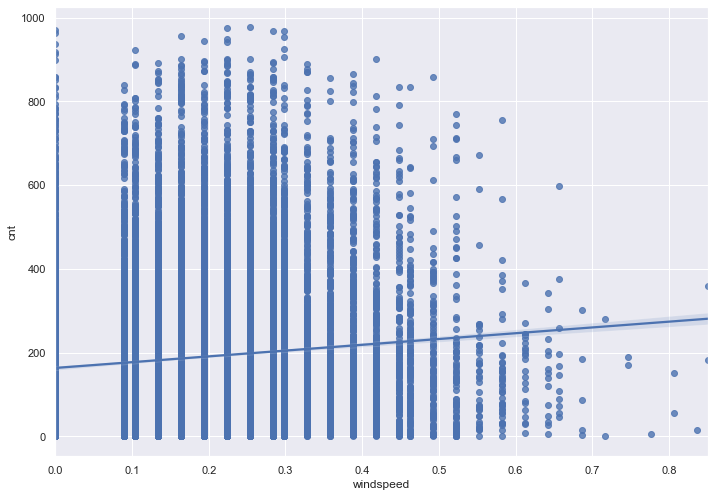

In [238]:
# Visualisasi pengaruh kecepatan angin terhadap penyewaan sepeda
sns.regplot(data=df, x = df['windspeed'], y=df['cnt'])

<AxesSubplot:>

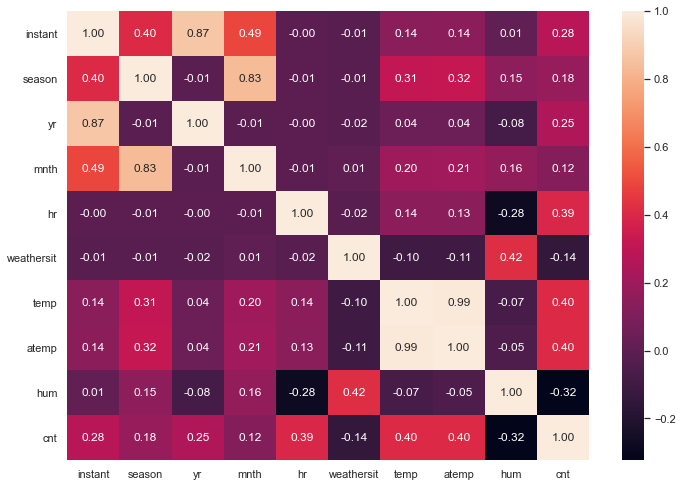

In [239]:
# Dari visualisasi yang dilakukan terlihat tidak ada perbedaan signifikan
# yang mempengaruhi penyewaan sepeda untuk variabel 
# holiday, weekday, workingday, windspeed sehingga kolom tersebut kita hapus
df = df.drop(['holiday', 'weekday', 'workingday', 'windspeed'], axis=1)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

<AxesSubplot:>

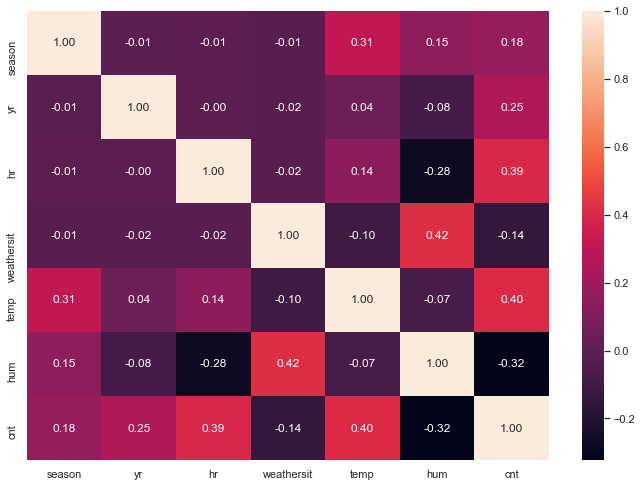

In [240]:
# Selanjutnya kolom instant (record index) dan dteday (tanggal) akan dihapus karena tidak akan mempengaruhi penyewaan sepeda
# Kolom atemp juga perlu dihapus karena memiliki korelasi yang kuat dengan kolom temp sehingga salah satu harus dihapus
# Kolom mnth juga perlu dihapus karena memiliki korelasi yang kuat dengan kolom season sehingga salah satu harus dihapus
# Kita hanya menggunakan kolom season untuk mencoba memprediksi penyewaan sepeda
df = df.drop(['instant', 'atemp', 'mnth'], axis=1)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

In [241]:
# Ubah variabel bertipe kategori yang tersisa dan masih bertipe numerik yaitu:
# - season : season (1:winter, 2:spring, 3:summer, 4:fall)
# - yr : year (0: 2011, 1:2012)
# - hr : hour (0 to 23)
# - weathersit : (1 to 4)

# Gunakan method get_dummies() yang disediakan oleh pandas untuk melakukan teknik One-Hot Encoding
df = pd.get_dummies(data=df, columns=['season', 'yr', 'weathersit'])
print(df)

           dteday  hr  temp   hum  cnt  season_1  season_2  season_3  \
0        1/1/2011   0  0.24  0.81   16         1         0         0   
1        1/1/2011   1  0.22  0.80   40         1         0         0   
2        1/1/2011   2  0.22  0.80   32         1         0         0   
3        1/1/2011   3  0.24  0.75   13         1         0         0   
4        1/1/2011   4  0.24  0.75    1         1         0         0   
...           ...  ..   ...   ...  ...       ...       ...       ...   
17374  12/31/2012  19  0.26  0.60  119         1         0         0   
17375  12/31/2012  20  0.26  0.60   89         1         0         0   
17376  12/31/2012  21  0.26  0.60   90         1         0         0   
17377  12/31/2012  22  0.26  0.56   61         1         0         0   
17378  12/31/2012  23  0.26  0.65   49         1         0         0   

       season_4  yr_0  yr_1  weathersit_1  weathersit_2  weathersit_3  \
0             0     1     0             1             0       

In [242]:
from sklearn.model_selection import train_test_split

y = df['cnt'] # cnt sebagai label
X = df.drop(columns=['dteday', 'cnt']) # sisanya sebagai fitur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [243]:
# Install XGBoost
!conda install -c conda-forge xgboost -y

Solving environment: ...working... done

# All requested packages already installed.



In [244]:
# Menggunakan 5 jenis model dengan tipe yang berbeda
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor # Metode Neural Network Terbaru

LinRegModel = LinearRegression()
KNNRegModel = KNeighborsRegressor()
SVRegModel = SVR()
DTRegModel = DecisionTreeRegressor()
RFRegModel = RandomForestRegressor()
XGBRegModel = XGBRegressor()

# Menggunakan 3 macam metrik evaluasi
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [245]:
model = [LinRegModel, KNNRegModel, SVRegModel, DTRegModel, RFRegModel, XGBRegModel]
R2_score = {}
MAE = {}
MSE = {}

# looping model dan masukkan kedalam metrik evaluasi
for i in range(len(model)):
    model[i].fit(X_train, y_train)
    pred = model[i].predict(X_test)
    R2_score[model[i].__class__.__name__] = r2_score(y_test, pred)
    MAE[model[i].__class__.__name__] = mean_absolute_error(y_test, pred)
    MSE[model[i].__class__.__name__] = mean_squared_error(y_test, pred)

In [246]:
pred_KNN = pd.Series(KNNRegModel.predict(X_test))
print(y_test, pred_KNN)

13974    251
17170      6
11594    384
1949      31
17230     36
        ... 
9670      36
5078     205
8419     145
838      118
13046    581
Name: cnt, Length: 3476, dtype: int64 0       196.0
1        13.6
2       181.8
3        43.0
4       236.8
        ...  
3471     68.4
3472    178.0
3473     83.8
3474    101.0
3475    490.6
Length: 3476, dtype: float64


{'LinearRegression': 0.38658569541186705, 'KNeighborsRegressor': 0.722546756661824, 'SVR': 0.33074519661875657, 'DecisionTreeRegressor': 0.5695055879509422, 'RandomForestRegressor': 0.7399843707040062, 'XGBRegressor': 0.7701039358028612}


[Text(0, 0, 'LinearRegression'),
 Text(1, 0, 'KNeighborsRegressor'),
 Text(2, 0, 'SVR'),
 Text(3, 0, 'DecisionTreeRegressor'),
 Text(4, 0, 'RandomForestRegressor'),
 Text(5, 0, 'XGBRegressor')]

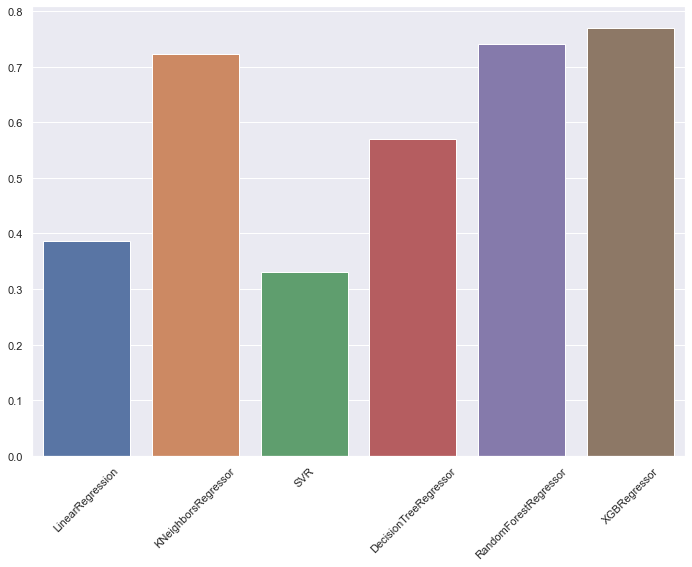

In [247]:
print(R2_score)
plot = sns.barplot(x=list(R2_score.keys()),y=list(R2_score.values()))
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

{'LinearRegression': 104.9992009572507, 'KNeighborsRegressor': 61.87439585730725, 'SVR': 93.70776603299016, 'DecisionTreeRegressor': 71.09931434599156, 'RandomForestRegressor': 58.401502244942115, 'XGBRegressor': 57.2447415670708}


[Text(0, 0, 'LinearRegression'),
 Text(1, 0, 'KNeighborsRegressor'),
 Text(2, 0, 'SVR'),
 Text(3, 0, 'DecisionTreeRegressor'),
 Text(4, 0, 'RandomForestRegressor'),
 Text(5, 0, 'XGBRegressor')]

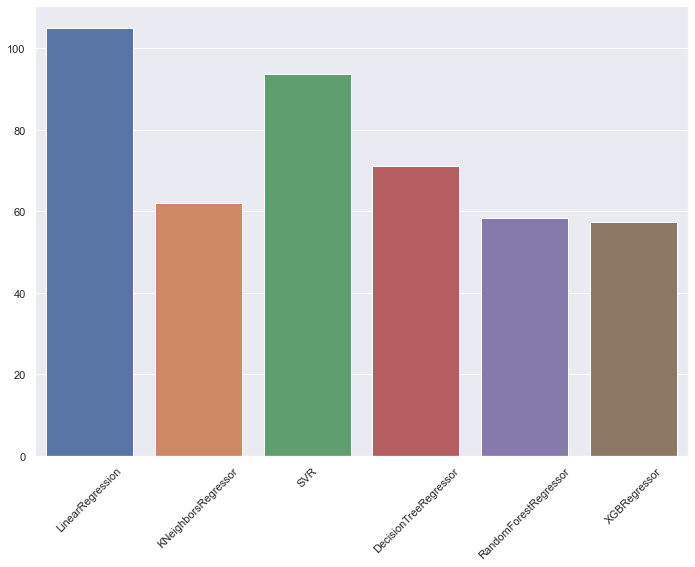

In [248]:
print(MAE)
plot = sns.barplot(x=list(MAE.keys()),y=list(MAE.values()))
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

{'LinearRegression': 19607.590309663527, 'KNeighborsRegressor': 8868.70339470656, 'SVR': 21392.51383497604, 'DecisionTreeRegressor': 13760.614969233473, 'RandomForestRegressor': 8311.3156886166, 'XGBRegressor': 7348.553509211412}


[Text(0, 0, 'LinearRegression'),
 Text(1, 0, 'KNeighborsRegressor'),
 Text(2, 0, 'SVR'),
 Text(3, 0, 'DecisionTreeRegressor'),
 Text(4, 0, 'RandomForestRegressor'),
 Text(5, 0, 'XGBRegressor')]

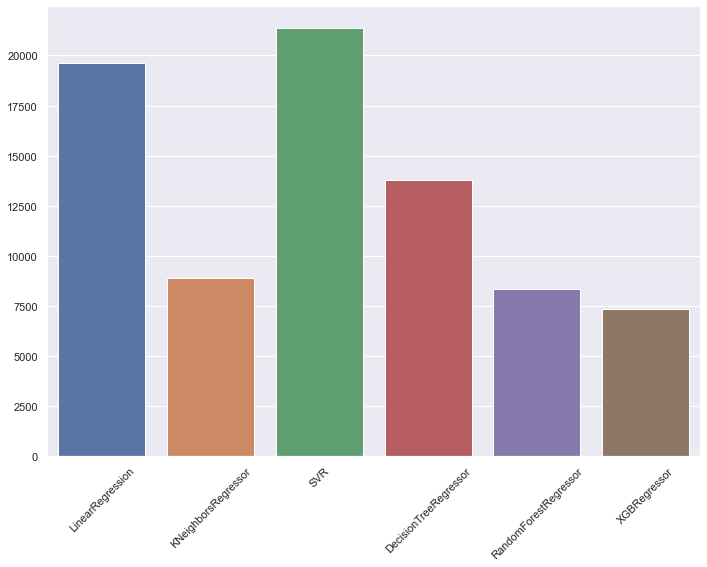

In [249]:
print(MSE)
plot = sns.barplot(x=list(MSE.keys()),y=list(MSE.values()))
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

<AxesSubplot:>

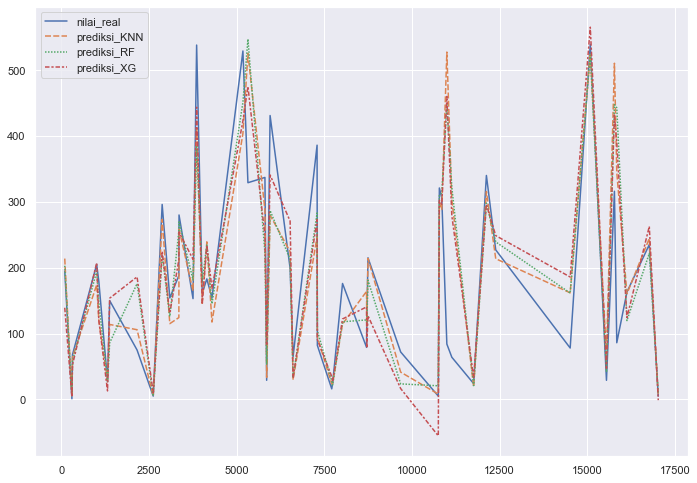

In [255]:
# Visualisasi prediksi dari 3 model terbaik yaitu 
# KNNeigborsRegressor, RandomForestRegressor, dan XGBoostRegressor

df_plot = pd.DataFrame()

df_plot['nilai_real'] = y_test
df_plot['prediksi_KNN'] = KNNRegModel.predict(X_test)
df_plot['prediksi_RF'] = RFRegModel.predict(X_test)
df_plot['prediksi_XG'] = XGBRegModel.predict(X_test)

sns.lineplot(data=df_plot.sample(50))